# **Visualización de Datos con Seaborn**

Creado por: **V. D. Betancourt**

![](https://storage.googleapis.com/deepnote-publishing-bucket/thumb/e3681a68-7f66-4a95-a2cd-72cd016aef18-thumb.png)

## Settings

In [ ]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

## Dataset

In [ ]:
# Carga del Dataset del Titanic
#url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

s = requests.get(url).content
titanic = pd.read_csv(io.StringIO(s.decode('utf 8')))

---

## Exploración

### Información del Dataset

In [ ]:
#Informacion del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Renombrar Columnas

In [ ]:
#Renombra la columna class clase y fare=tarifa
titanic.rename(columns={'class': 'clase'},inplace=True)
titanic.rename(columns={'fare': 'tarifa'},inplace=True)



### Valores Únicos Distintos

In [ ]:
#Muestra los valores distintos para class(clase)
titanic.clase.unique()

#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Crear Nuevas Columnas

In [ ]:
#Añadimos nuevas columnas: is_old , is_baby
def is_old_func(row):
  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func , axis='columns')

#Otra forma de definir una nueva columna
titanic.eval( ' is_baby = age < 15 ' , inplace = True)

In [ ]:
#Define una variable numérica: class_num
def class_num_func(row):
  Clase = {'Third':3,'First':1,'Second':2}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func , axis='columns')

In [ ]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


### Query

Obtener todos los pasajeros tales que:

*   Son mujeres (`sex == female`)

*   Que pertenezcan a Primera Clase o Tercera Clase (se pueden usar las variables `clase` o `class_num`)

*   Con edad mayor a 45 años (`age > 45`)

*   Y que no hayan sobrevivido (`survived == 0`)

In [ ]:
# Query
titanic[
  (titanic.sex == 'female')
  & (titanic['clase'].isin(['First', 'Third']))
  & (titanic.age > 45 )
  & (titanic.survived == 0)
]


,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


---

---

## Seaborn

### Distribuciones Univariadas

#### Countplot

Un **countplot** es un tipo de gráfico que muestra la cantidad de veces que aparece cada valor en una variable categórica. En otras palabras, cuenta la cantidad de observaciones que hay para cada categoría y representa esta información en forma de barras. Es una manera rápida y fácil de visualizar la distribución de una variable categórica.

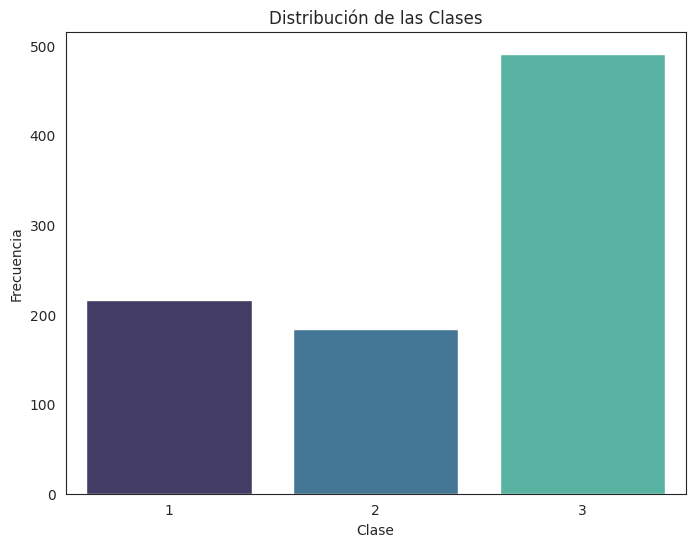

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Histograma
# Dataset
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de distribución de las clases con la función countplot
plt.figure(figsize=(8, 6))
sns.countplot(x="class_num", data=titanic, palette='mako')

# Añadir título y etiquetas
plt.title('Distribución de las Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.show()


#### Histplot

Un **histplot** es un tipo de gráfico que muestra la distribución de una variable numérica mediante la agrupación de los datos en contenedores, también conocidos como "***bins***". El eje x representa los valores de la variable numérica y el eje y representa la cantidad de observaciones en cada bin. Es una forma rápida y sencilla de ver cómo se distribuyen los datos y cómo se concentran alrededor de ciertos valores.

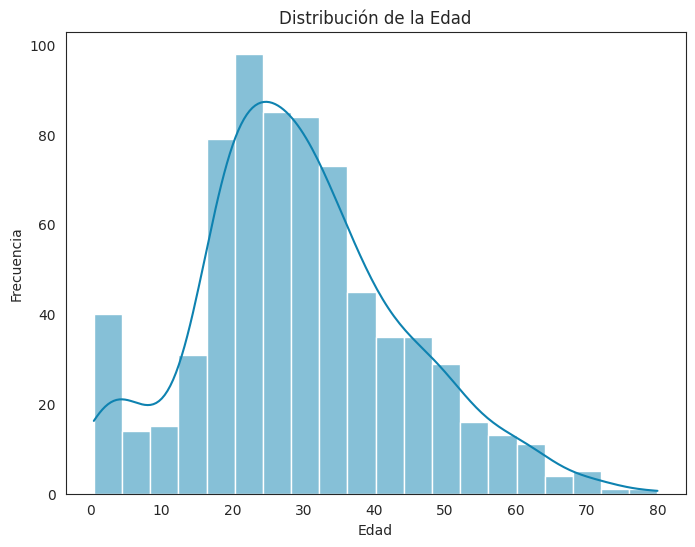

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Histograma
# Dataset
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de distribución de la edad con la función histplot
plt.figure(figsize=(8, 6))
sns.histplot(titanic.age.dropna(), kde=True, color='#0E82B0')

# Añadir título y etiquetas
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()


### Distribuciones Bivariadas

#### Jointplot: Distribución Cruzada

Un **jointplot** o **distribución cruzada**, es un tipo de gráfico que muestra la relación entre dos variables numéricas, incluyendo su distribución individual. Combina un ***histograma*** para cada variable en los ejes x e y, junto con un ***gráfico de dispersión (scatterplot)*** en el centro que muestra la relación entre las dos variables. Es una herramienta útil para detectar patrones y tendencias en datos bivariados, y también puede mostrar la presencia de valores atípicos o puntos influyentes.

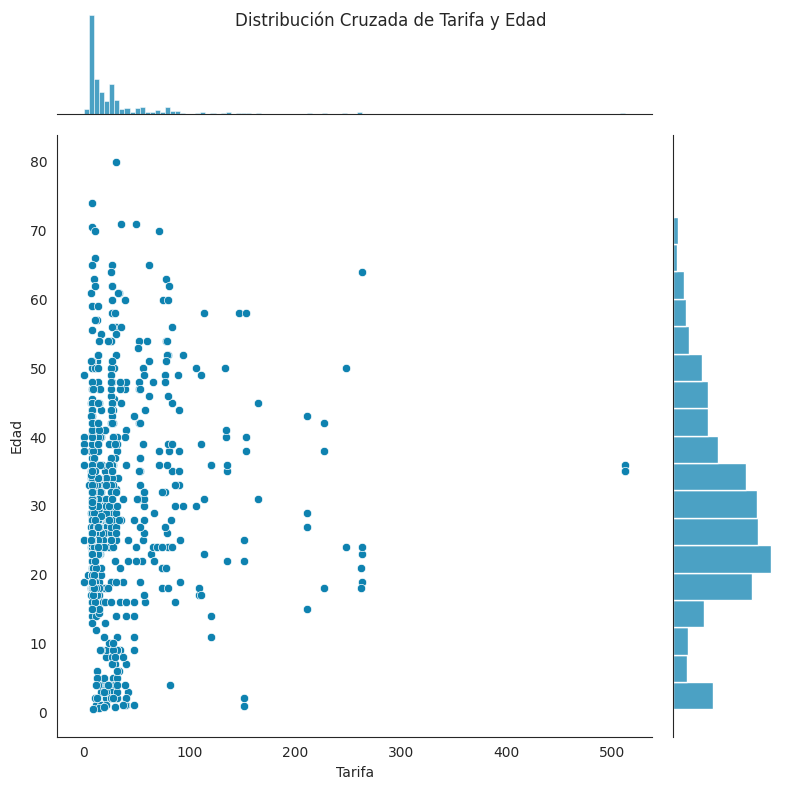

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Distribución Cruzada (Jointplot)
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de distribución cruzada con la función jointplot
g = sns.jointplot(x="tarifa", y="age", data=titanic, height=8, marker="o", color='#0E82B0') # #416289, #0E82B0

# Añadir etiquetas y título
g.set_axis_labels("Tarifa", "Edad")
g.fig.suptitle('Distribución Cruzada de Tarifa y Edad', fontsize=12)

plt.show()


### Distribuciones Multivariadas

#### Pairplot

Un **pairplot** es un tipo de gráfico que muestra la relación entre pares de variables numéricas en un conjunto de datos. Cada gráfico en el pairplot muestra la distribución individual de una variable en el eje diagonal, y la relación bivariada entre dos variables en el resto de los gráficos. Es una herramienta útil para detectar patrones y tendencias en datos multivariados, y puede ser una forma eficaz de visualizar la matriz de correlación de un conjunto de datos.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been ass

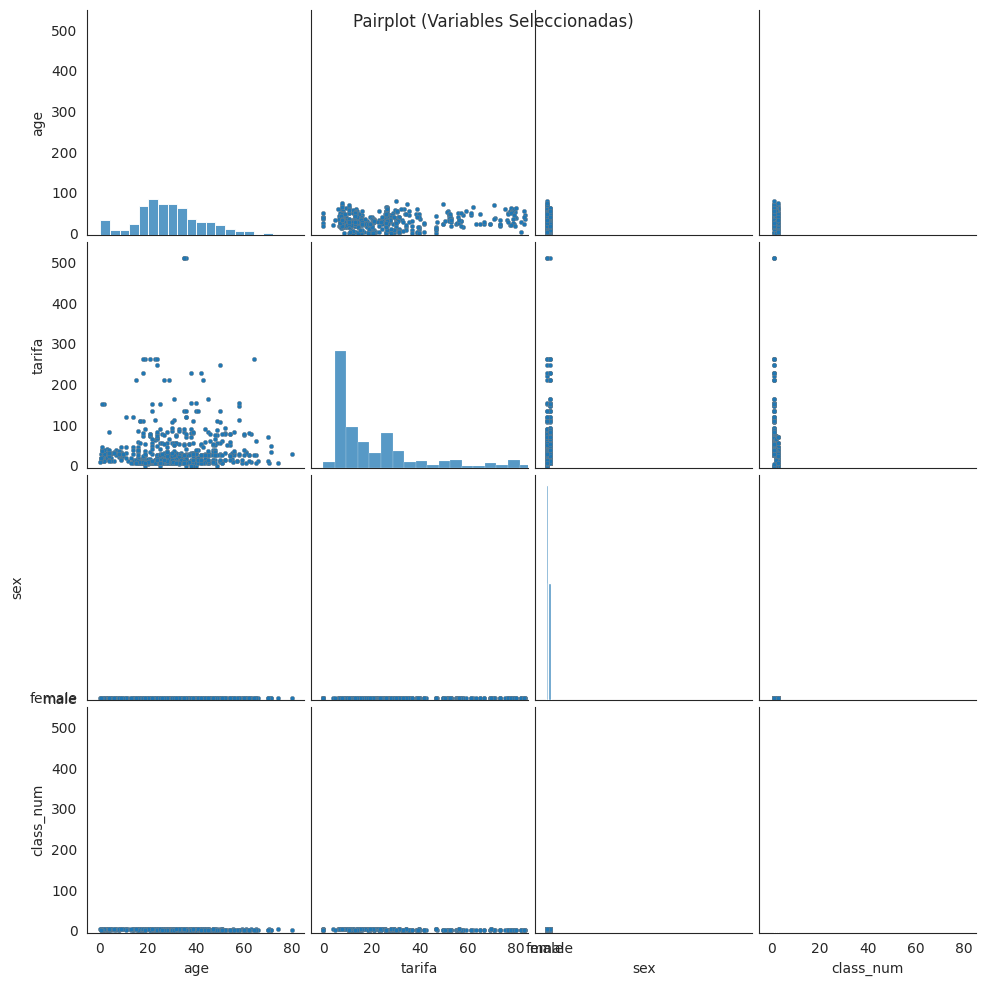

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Pairplot
# Dataset
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de scatterplot matrix con la función pairplot
g = sns.pairplot(titanic, vars=["age", "tarifa", "sex", "class_num"], palette='mako', plot_kws=dict(s=10, edgecolor="gray"))

# Añadir título y ajustar los ejes
g.fig.suptitle('Pairplot (Variables Seleccionadas)', fontsize=12)
g.set(xlim=(-5, 85), ylim=(-5, 550))

plt.show()


#### FacetGrid y Subplots: Clase, Edad, Supervivientes

Un **FacetGrid** con subplots es un tipo de gráfico que permite visualizar la relación entre múltiples variables en diferentes paneles de gráficos. Permite segmentar los datos en subconjuntos más pequeños y aplicar diferentes gráficos a cada uno de ellos.


Los **subplots** se organizan en una cuadrícula, donde cada eje representa una variable distinta y cada panel de gráficos muestra la relación entre las variables correspondientes.


Es una herramienta útil para explorar y visualizar patrones complejos en ***datos multivariados*** y puede proporcionar información valiosa sobre cómo interactúan diferentes variables.

**Diagrama de Distribución de Clase/Edad y Supervivientes**

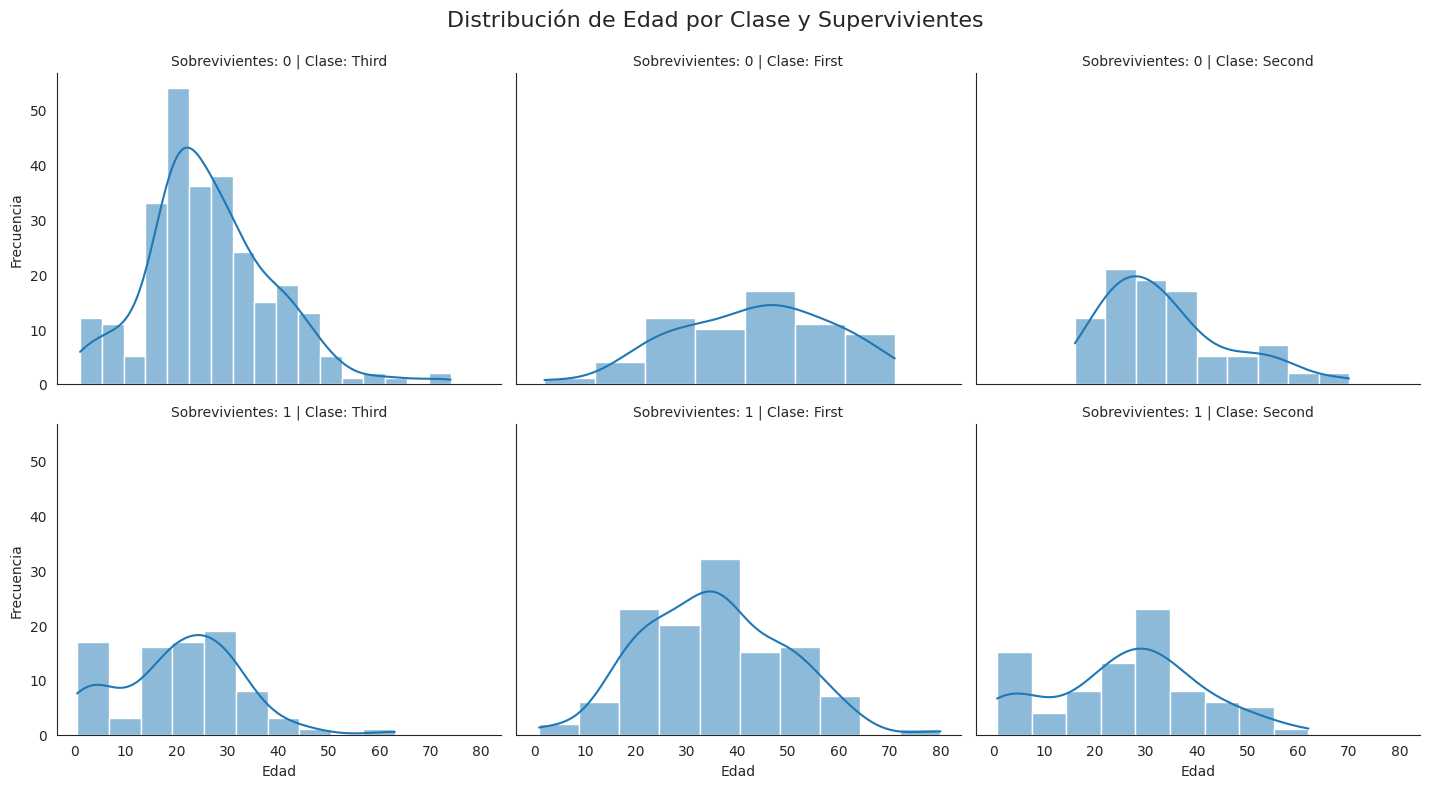

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Matriz de Gráficos
# Cargar dataset
#titanic = sns.load_dataset('titanic')

# Crear la matriz de gráficos con la función FacetGrid
g = sns.FacetGrid(titanic, row='survived', col='clase', height=4, aspect=1.2, palette='mako')

# Crear un histograma para cada gráfico en la matriz
#g.map(sns.histplot, "age", kde=True, color='darkblue')
g.map(sns.histplot, "age", kde=True)

# Añadir etiquetas y título
g.set_axis_labels("Edad", "Frecuencia")
g.set_titles(row_template = "Sobrevivientes: {row_name}", col_template = "Clase: {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Edad por Clase y Supervivientes', fontsize=16)

plt.show()


#### FacetGrid y Subplots: Clase, Edad, Supervivientes, Género

**Diagrama de Distribución de Clase/Edad y Supervivientes/Género**

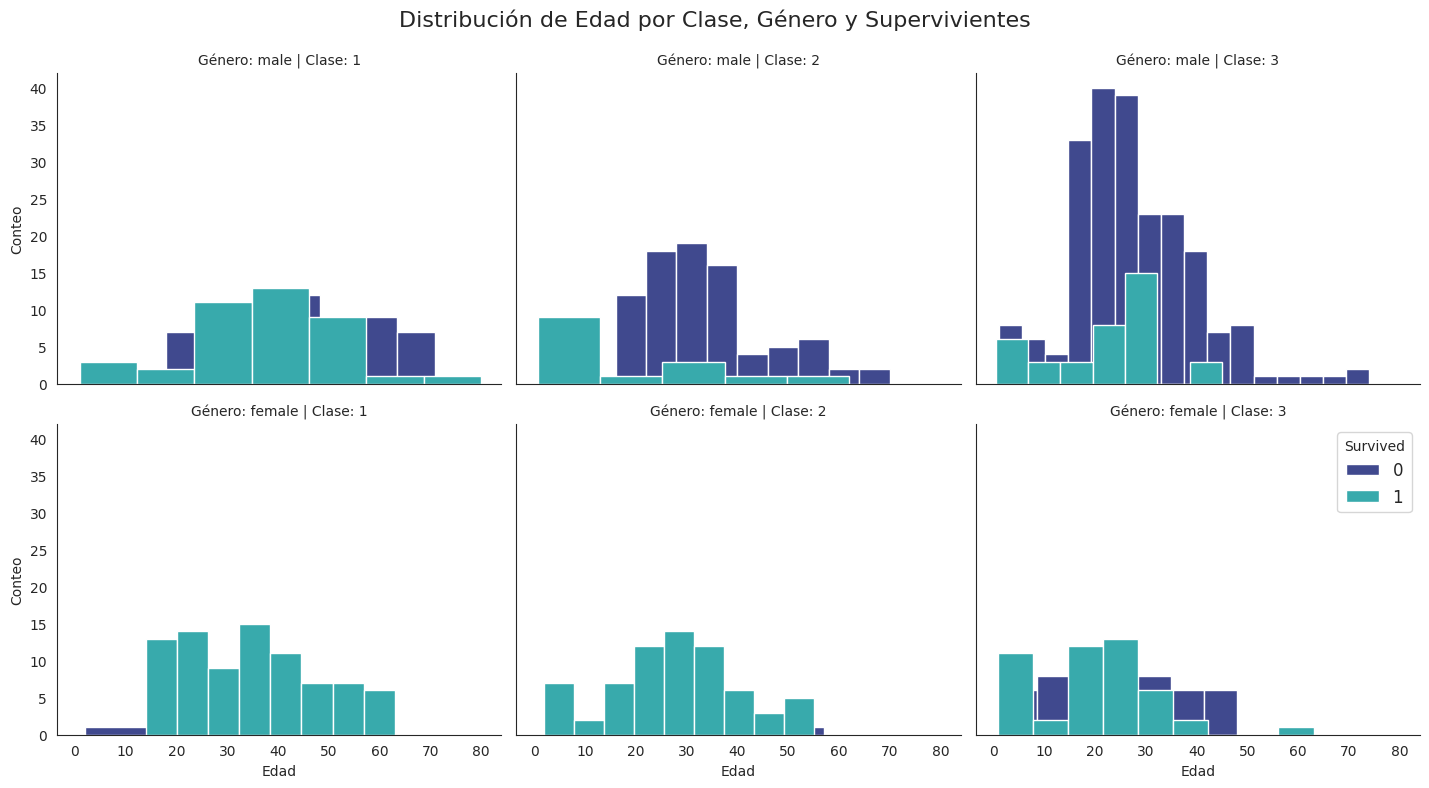

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Diagrama de Distribución de Clase/Edad y Supervivientes/Género
# Dataset
#titanic = sns.load_dataset('titanic')

# Crear la matriz de gráficos con la función FacetGrid
#g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', palette={0:'darkblue', 1:'darkorange'},
#                  height=4, aspect=1.2)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', palette='mako',
                  height=4, aspect=1.2)


# Crear un histograma de barras para cada gráfico en la matriz
g.map(sns.histplot, "age", kde=False, element="bars", alpha=1) # alpha es para la transparencia

# Añadir etiquetas y título
g.set_axis_labels("Edad", "Conteo")
g.set_titles(row_template = "Género: {row_name}", col_template = "Clase: {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Edad por Clase, Género y Supervivientes', fontsize=16)

# Agregar leyenda
plt.legend(title='Survived', fontsize=12, labels=['0', '1'])

plt.show()


#### Pairplot y Dipersión

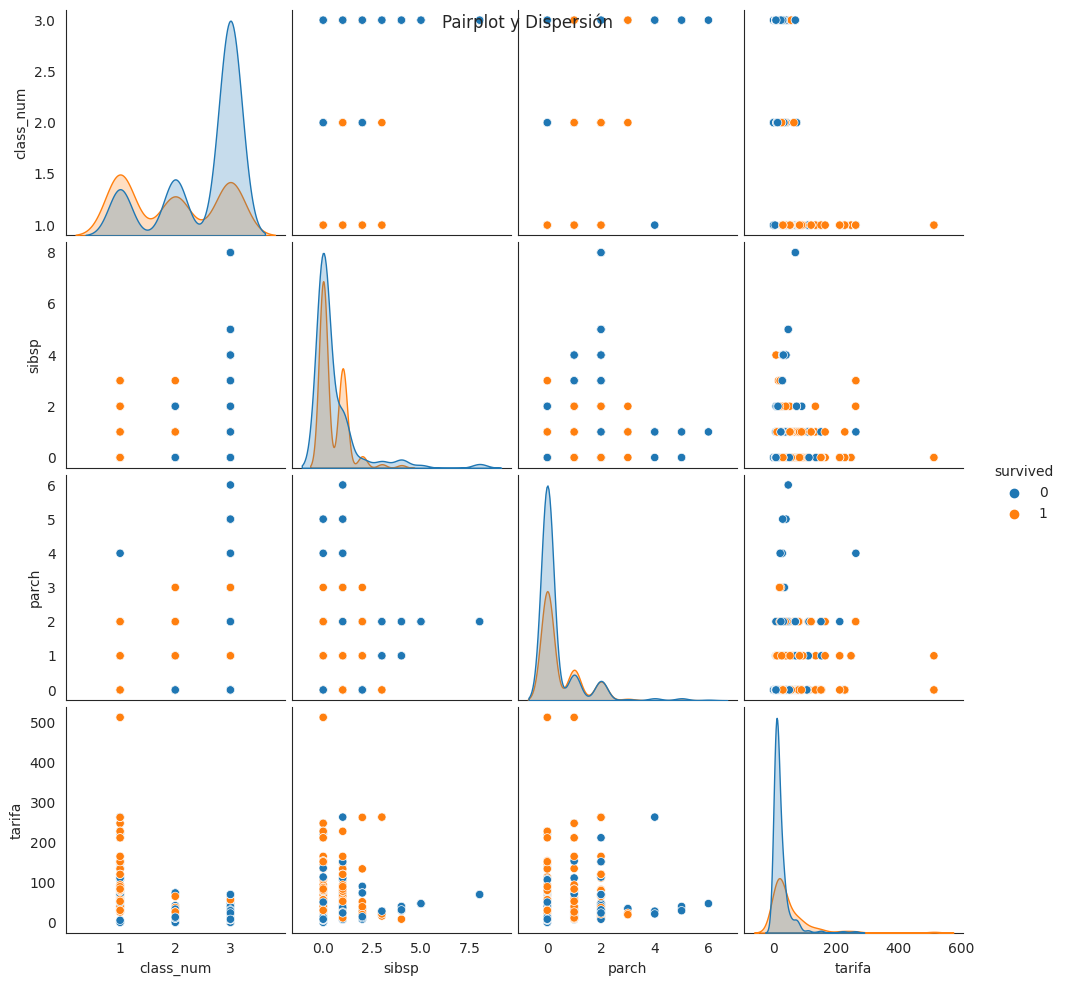

In [ ]:
# Pairplot Dispersión
titanic_num = titanic[['survived','class_num','sibsp','parch','tarifa']]

# Pairplot de las variables
g = sns.pairplot(titanic_num, hue="survived")

g.fig.suptitle('Pairplot y Dispersión', fontsize=12)

plt.show()

### Gráficos de Relación

#### Jointplot y Regresión Lineal

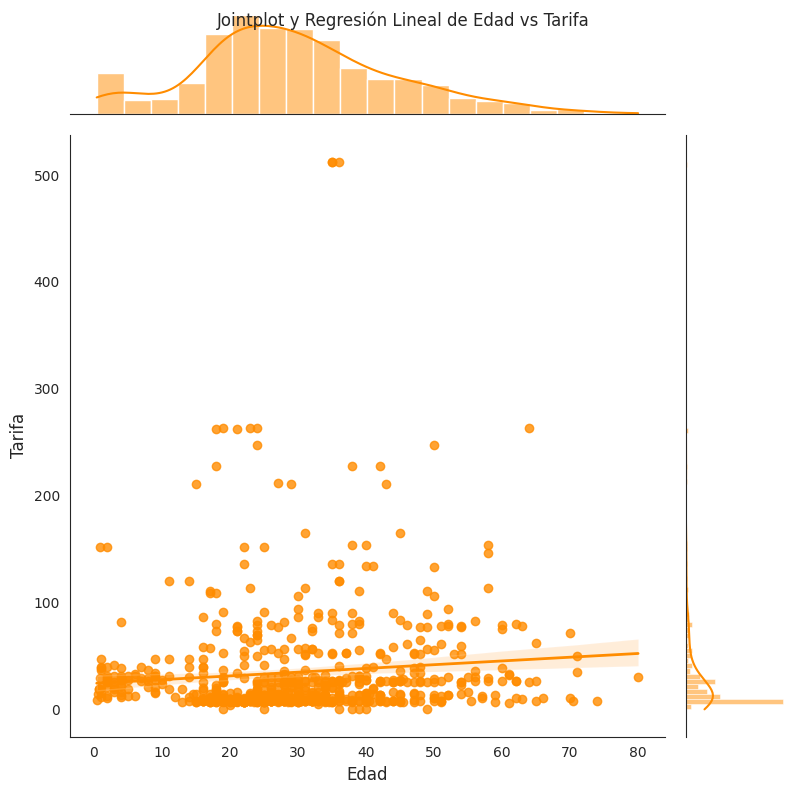

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Diagrama de Dispersión
# Cargar dataset
#titanic = sns.load_dataset('titanic')

# Crear el diagrama de dispersión con la función jointplot
sns.set_style('white')
g = sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='darkorange',
                  height=8, joint_kws={'line_kws':{'linewidth':2}})

# Agregar etiquetas y título
g.set_axis_labels("Edad", "Tarifa", fontsize=12)
g.fig.suptitle("Jointplot y Regresión Lineal de Edad vs Tarifa", fontsize=12)

plt.show()



#### Jointplot y Hexbin Plot

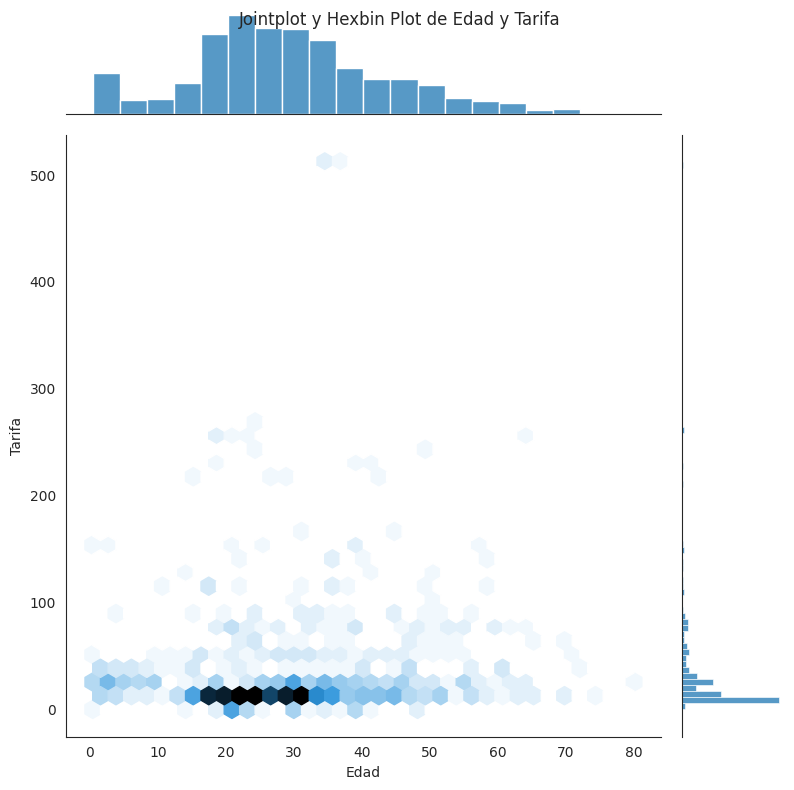

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Histograma con Hexagonal
# Dataset
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de histograma con hexagonal con la función jointplot
g = sns.jointplot(data=titanic, x='age', y='tarifa', kind='hex', height=8, bins=30, palette='magma')

# Añadir etiquetas y título
g.set_axis_labels("Edad", "Tarifa")
g.fig.suptitle('Jointplot y Hexbin Plot de Edad y Tarifa', fontsize=12)

plt.show()


#### Heatmap: Diagrama de Correlaciones

Un **heatmap** de correlaciones es un tipo de gráfico que muestra la **matriz de correlación** de un conjunto de datos como un mapa de calor.


El mapa de calor utiliza diferentes colores para representar diferentes ***valores de correlación***, lo que permite visualizar rápidamente las relaciones entre pares de variables. Los ***valores altos*** de correlación se representan con colores más brillantes, mientras que los ***valores bajos*** se representan con colores más oscuros o fríos (o viceversa, dependiendo de la paleta de colores que se esté utilizando).


Es una herramienta útil para ***identificar patrones y relaciones*** entre múltiples variables y puede ayudar a identificar qué variables están más correlacionadas entre sí.

<ipython-input-19-6d5bb493e88c>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


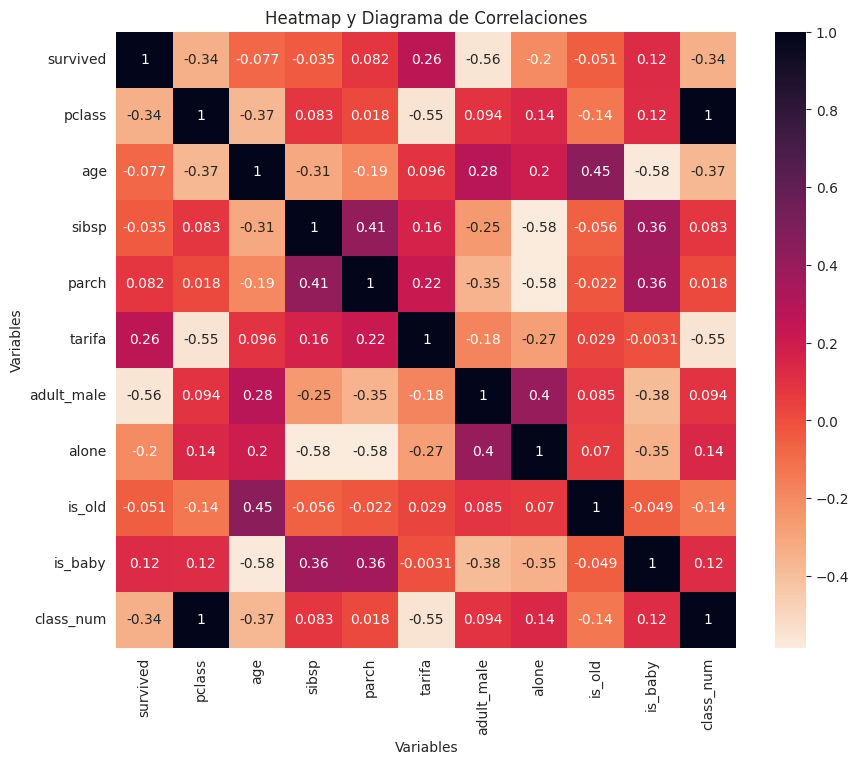

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Diagrama de Correlaciones
# Dataset
#titanic = sns.load_dataset('titanic')

# Crear el diagrama de correlaciones
tc = titanic.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(tc, cmap='rocket_r', annot=True, ax=ax) # Opciones cmap: RdYlBu, magma, YlOrBr, crest, rocket_r

# Agregar etiquetas y título
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")
ax.set_title("Heatmap y Diagrama de Correlaciones")
plt.show()


### Gráficos de Distribución

#### Catplot

La **catplot** es una función de alto nivel de la ***librería Seaborn*** que permite crear diferentes tipos de gráficos categóricos, como boxplots, violín plots, count plots y otros, en una sola línea de código. En otras palabras, **catplot** es una herramienta que facilita la creación de gráficos categóricos y que permite personalizarlos para adaptarse a diferentes necesidades.

El argumento **kind="box"** en catplot permite crear un ***boxplot*** para cada valor de una variable categórica. Mientras que **kind="violin"** permite crear un ***violin plot***.

#### Catplot: Boxplot

Un **boxplot** es un tipo de gráfico que muestra la distribución de una variable numérica a través de cinco estadísticos clave:

*  la mediana,

*  el primer cuartil (Q1),

*  el tercer cuartil (Q3) y

*  los valores mínimo y máximo.


El boxplot utiliza un rectángulo para representar la distribución de los datos, donde la ***altura*** del rectángulo representa el ***rango intercuartil*** (IQR = Q3 - Q1) y la ***línea*** dentro del rectángulo representa la ***mediana***. Las líneas que se extienden desde el rectángulo, conocidas como bigotes, representan los valores mínimo y máximo que no son valores atípicos.


Los ***valores atípicos (outliers)*** se representan como puntos individuales más allá de los bigotes. Es una herramienta útil para visualizar rápidamente la distribución y la dispersión de una variable numérica y para identificar valores atípicos o extremos.

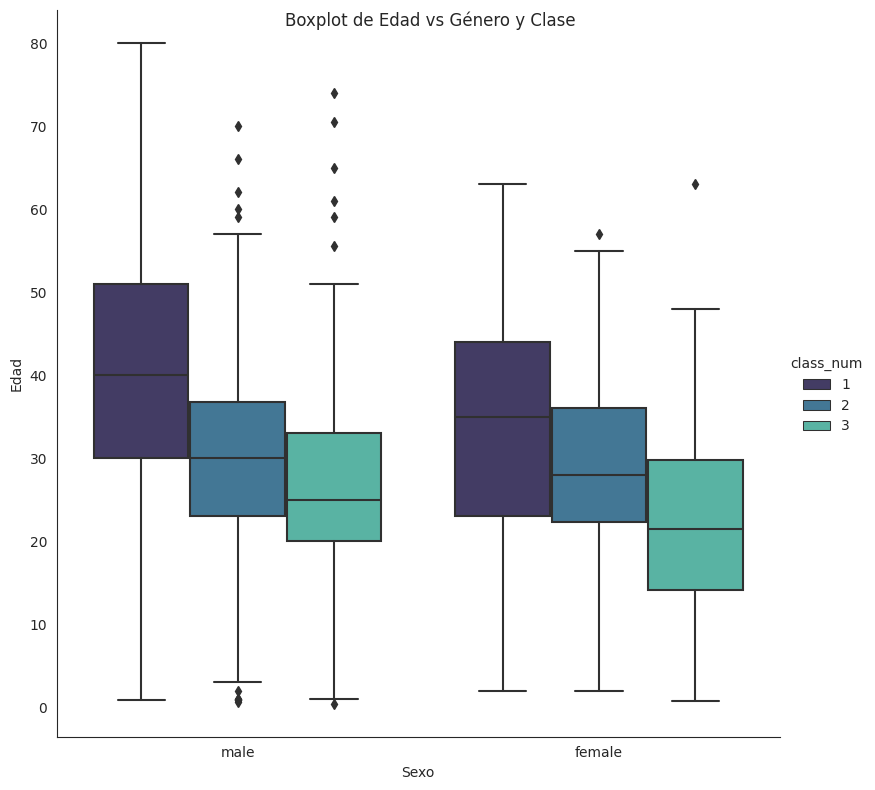

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Boxplot
# Dataset
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de boxplot de edad vs sexo con la función catplot
g = sns.catplot(data=titanic, x="sex", y="age", hue="class_num", kind="box", height=8, palette='mako') # RdYlBu, magma, YlOrBr, crest, rocket_r, colorblind

# Añadir etiquetas y título
g.set_axis_labels("Sexo", "Edad")
g.fig.suptitle('Boxplot de Edad vs Género y Clase', fontsize=12)

plt.show()


#### Catplot: Violin Plot

Un **violin plot** es un tipo de gráfico que muestra la distribución de una variable numérica a través de una representación de la densidad de probabilidad.


El gráfico utiliza una forma de violín para mostrar la distribución, donde el ***ancho*** del violín representa la ***densidad*** de la distribución en cada punto y las ***líneas*** en el interior del violín representan la ***mediana*** y los ***cuartiles***.


Es una herramienta útil para ***visualizar la forma y la dispersión*** de la distribución de una variable numérica y para comparar varias distribuciones entre sí.

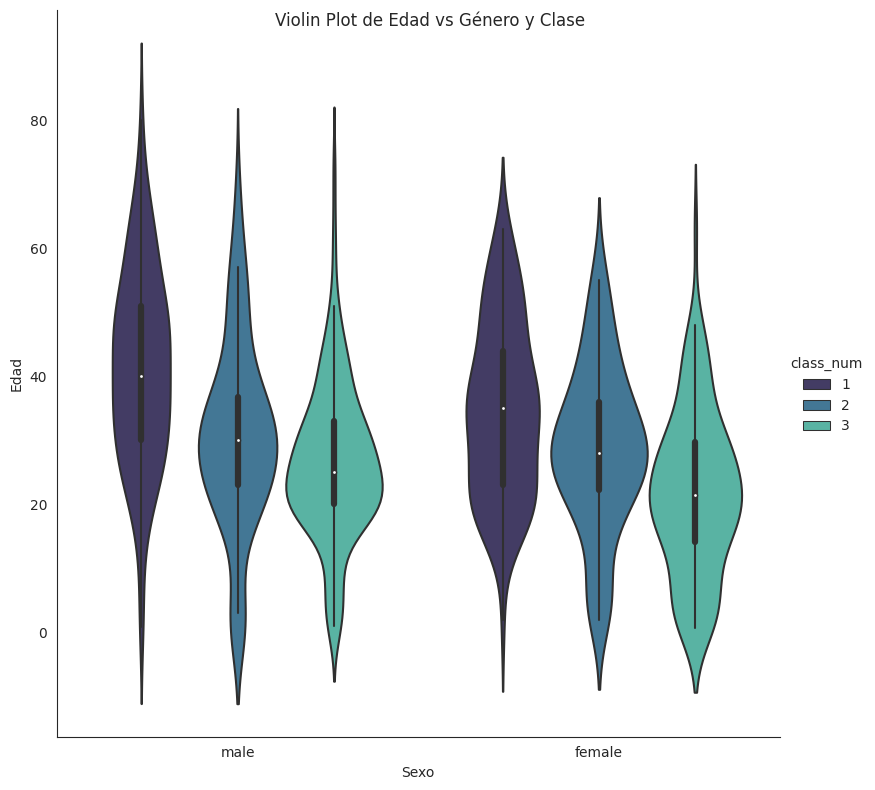

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Violin Plot
# Dataset
#titanic = sns.load_dataset('titanic')

# Configurar el estilo de los gráficos
sns.set_style('white')

# Crear el gráfico de violin plot de edad vs sexo con la función catplot
g = sns.catplot(data=titanic, x="sex", y="age", hue="class_num", kind="violin", height=8, palette='mako') # RdYlBu, magma, YlOrBr, crest, rocket_r

# Añadir etiquetas y título
g.set_axis_labels("Sexo", "Edad")
g.fig.suptitle('Violin Plot de Edad vs Género y Clase', fontsize=12)

plt.show()
